# **Classifying Handwritten Alphabets using CNN**

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import json
import matplotlib.pyplot as plt
from sklearn import model_selection


In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
# loading train data from csv file
X_train = pd.read_csv('emnist-letters-train.csv')
# dropping 'target' class from the data
y_train = np.array(X_train['target'])
X_train = X_train.drop(['target'], axis=1)

# loading test data from csv file
X_test = pd.read_csv('emnist-letters-test.csv')
# dropping 'target' class from the data
y_test = np.array(X_test['target'])
X_test = X_test.drop(['target'], axis=1)


In [5]:
X_train = X_train / 255


# converting target into one hot encoding form
X_train = np.array(X_train)
b = np.zeros((y_train.size, y_train.max()+1))
b[np.arange(y_train.size), y_train] = 1
y_train = np.array(b)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
print(y_train.shape)


(88800, 27)


In [6]:
X_test = X_test / 255


# converting target into one hot encoding form
X_test = np.array(X_test)
b1 = np.zeros((y_test.size, 27))
b1[np.arange(y_test.size), y_test] = 1
y_test = np.array(b1)

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
print(y_test.shape)


(14800, 27)


In [7]:
num_classes = y_train.shape[1]
print(num_classes)

27


In [8]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
X_test, X_val, y_test, y_val = model_selection.train_test_split(X_test, y_test, test_size=0.1)

In [10]:
# build the model
model = baseline_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=200, verbose=2)

Train on 88800 samples, validate on 1480 samples
Epoch 1/10
 - 36s - loss: 0.7726 - acc: 0.7692 - val_loss: 0.4033 - val_acc: 0.8804
Epoch 2/10
 - 39s - loss: 0.3597 - acc: 0.8846 - val_loss: 0.3281 - val_acc: 0.8959
Epoch 3/10
 - 37s - loss: 0.2882 - acc: 0.9066 - val_loss: 0.2748 - val_acc: 0.9115
Epoch 4/10
 - 38s - loss: 0.2503 - acc: 0.9179 - val_loss: 0.2609 - val_acc: 0.9182
Epoch 5/10
 - 38s - loss: 0.2232 - acc: 0.9247 - val_loss: 0.2705 - val_acc: 0.9115
Epoch 6/10
 - 36s - loss: 0.2055 - acc: 0.9309 - val_loss: 0.2495 - val_acc: 0.9230
Epoch 7/10
 - 40s - loss: 0.1849 - acc: 0.9367 - val_loss: 0.2447 - val_acc: 0.9243
Epoch 8/10
 - 39s - loss: 0.1731 - acc: 0.9392 - val_loss: 0.2430 - val_acc: 0.9176
Epoch 9/10
 - 40s - loss: 0.1613 - acc: 0.9422 - val_loss: 0.2393 - val_acc: 0.9216
Epoch 10/10
 - 41s - loss: 0.1495 - acc: 0.9456 - val_loss: 0.2397 - val_acc: 0.9270


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


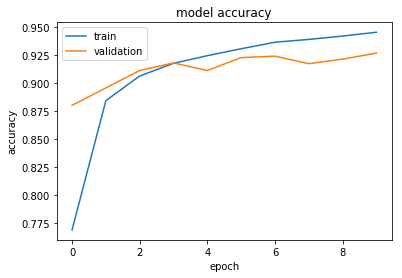

In [11]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


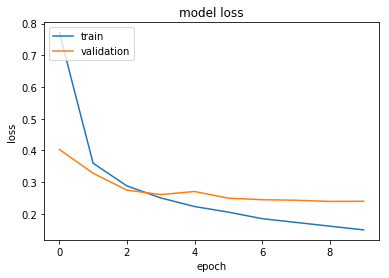

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=200)
print("test loss, test acc:", results)

Evaluate on test data
13320/13320 [==============================] - 2s 158us/step
test loss, test acc: [0.26532205952717375, 0.913963966720455]


### Final Accuracy = 91.39%